In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import glob

In [16]:
glob.glob(r'C:\Users\addak\0. Udemy\UCourse_Real-World Data Projects 1\S&P-500-Stock-Market-Time-Series-Analysis\individual_stocks_5yr/*csv')

['C:\\Users\\addak\\0. Udemy\\UCourse_Real-World Data Projects 1\\S&P-500-Stock-Market-Time-Series-Analysis\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\addak\\0. Udemy\\UCourse_Real-World Data Projects 1\\S&P-500-Stock-Market-Time-Series-Analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\addak\\0. Udemy\\UCourse_Real-World Data Projects 1\\S&P-500-Stock-Market-Time-Series-Analysis\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\addak\\0. Udemy\\UCourse_Real-World Data Projects 1\\S&P-500-Stock-Market-Time-Series-Analysis\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\addak\\0. Udemy\\UCourse_Real-World Data Projects 1\\S&P-500-Stock-Market-Time-Series-Analysis\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\addak\\0. Udemy\\UCourse_Real-World Data Projects 1\\S&P-500-Stock-Market-Time-Series-Analysis\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\addak\\0. Udemy\\UCourse_Real-World Data Projects 1\\S&P-500-Stock-Market-Time-Series-Analysis\\individ

In [18]:
len(glob.glob(r'C:\Users\addak\0. Udemy\UCourse_Real-World Data Projects 1\S&P-500-Stock-Market-Time-Series-Analysis\individual_stocks_5yr/*csv')) ##Total files

505

In [9]:
# Isolating and Storing files of Key Stock data for this analysis

In [8]:
company_list = [
    r'C:\Users\addak\0. Udemy\UCourse_Real-World Data Projects 1\S&P-500-Stock-Market-Time-Series-Analysis\individual_stocks_5yr\AAPL_data.csv',
    r'C:\Users\addak\0. Udemy\UCourse_Real-World Data Projects 1\S&P-500-Stock-Market-Time-Series-Analysis\individual_stocks_5yr\AMZN_data.csv',
    r'C:\Users\addak\0. Udemy\UCourse_Real-World Data Projects 1\S&P-500-Stock-Market-Time-Series-Analysis\individual_stocks_5yr\GOOG_data.csv',
    r'C:\Users\addak\0. Udemy\UCourse_Real-World Data Projects 1\S&P-500-Stock-Market-Time-Series-Analysis\individual_stocks_5yr\MSFT_data.csv'
]


In [20]:
## Warnings packages removes future warnings

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [22]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True)
# AttributeError issue fixed: 
## pd.concat([all_data, current_df], ignore_index=True) will concatenate the new data (current_df) to the existing DataFrame (all_data) while resetting the index.
## ignore_index=True ensures that the row indices are reset after concatenation.

In [24]:
all_data.shape ## dimensions of all_data dataframe ..

(4752, 7)

In [26]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [28]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [30]:
# 2. Analysing Change in Change of Stock Overtime

In [32]:
all_data.isnull().sum() ## checking missing values 

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [34]:
all_data.dtypes ## checking data-types 

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [36]:
all_data['date'] = pd.to_datetime(all_data['date']) ## converting data-type of "date" featuer into date-time ..

In [38]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [40]:
tech_list = all_data['Name'].unique()

In [42]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

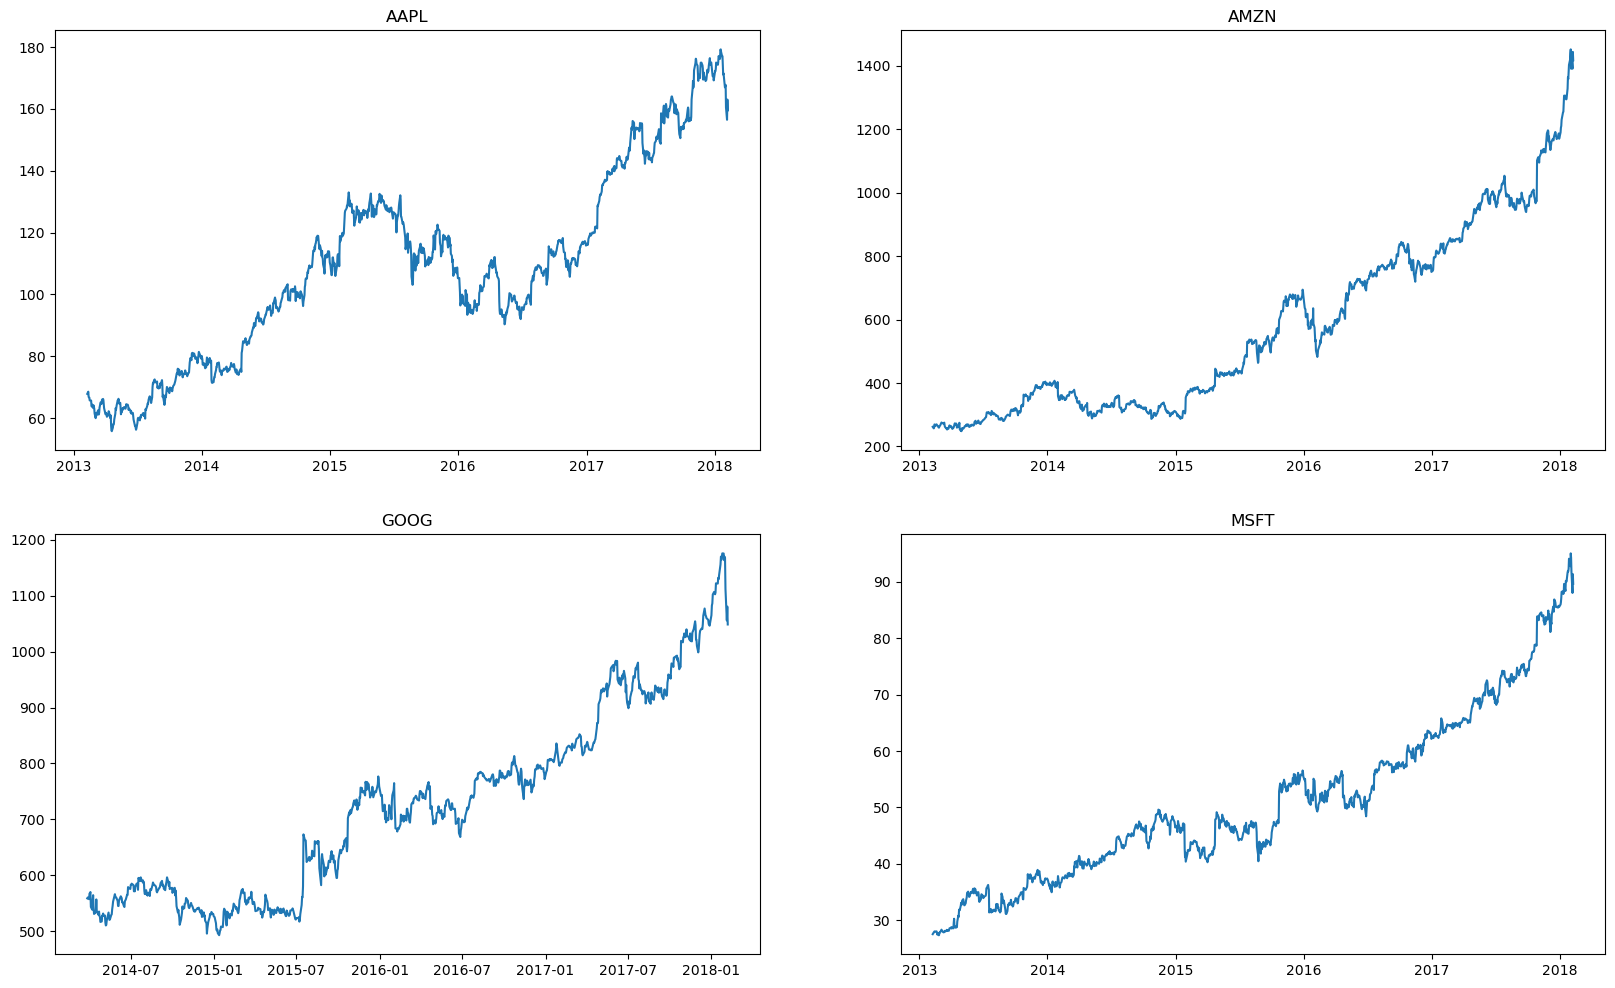

In [44]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index) ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## plotting "date" vs "close"
    plt.title(company)

In [46]:
# 3. moving average of the various stocks)

In [48]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [50]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [52]:
new_data = all_data.copy()

In [54]:
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [56]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [58]:
new_data.set_index('date' , inplace=True)

In [60]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


In [62]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

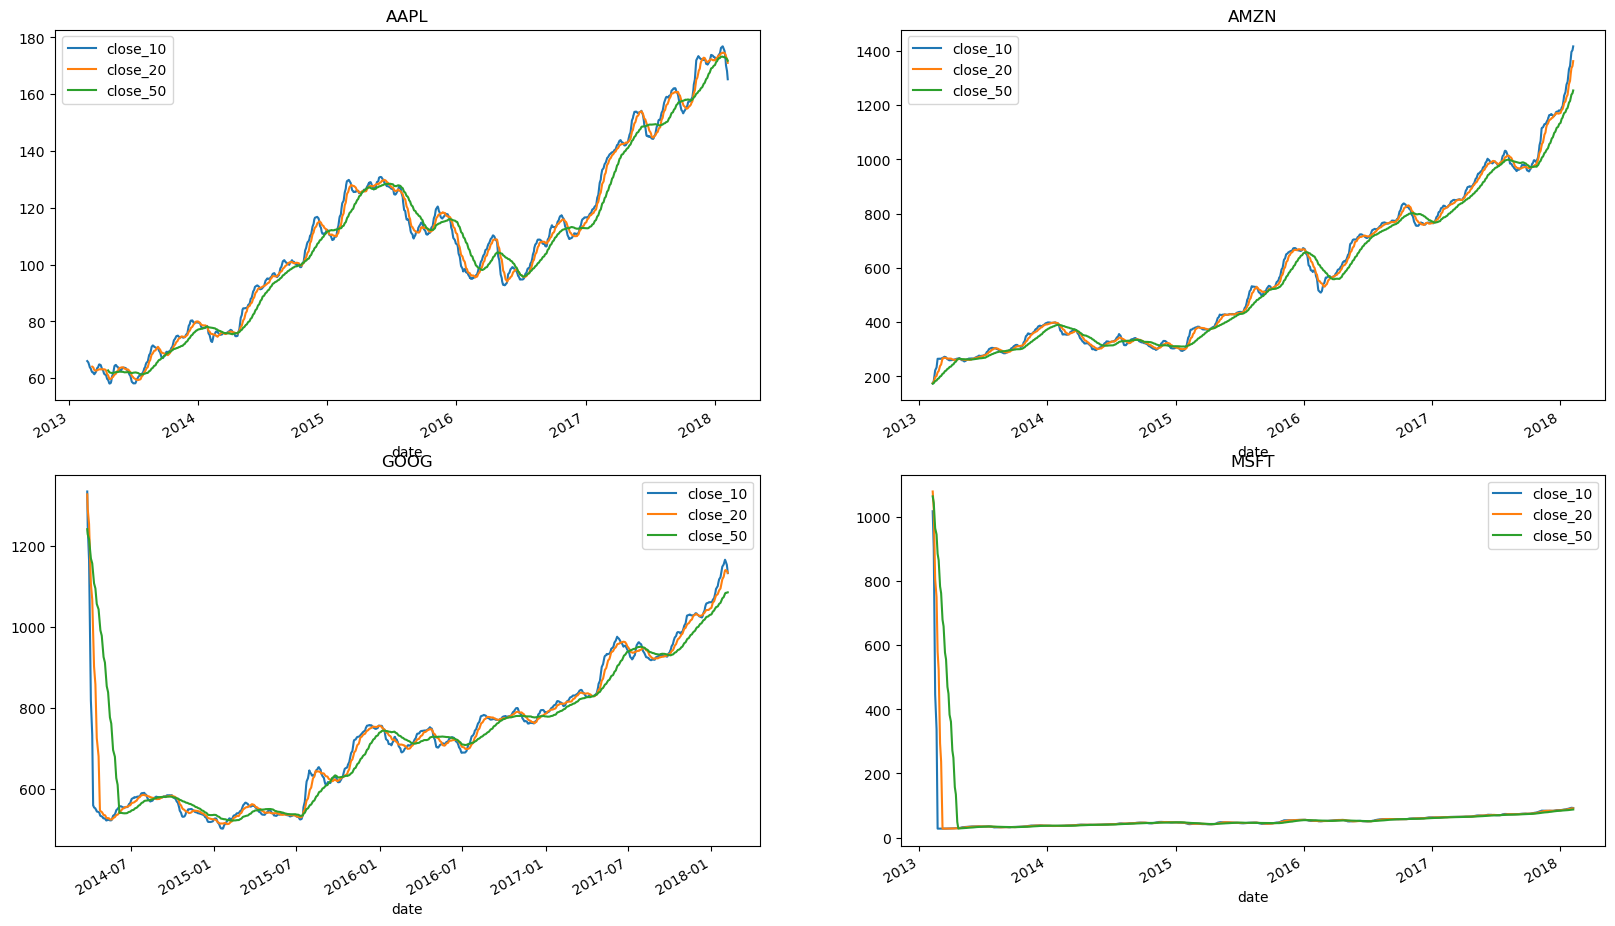

In [64]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)